
<h3><center>Unidad 2 - Etapa 3 - Componente práctico - Prácticas simuladas</center></h3>
<h3><center>Jancel Hernan Perez Paternina</center></h3>
<h3><center>Grupo: Análisis de datos_202016908</center></h3>

<h3><center>Yackeline Hernández</center></h3> 
<h3><center>Universidad Nacional Abierta y a Distancia-UNAD
<p><center>Escuela de Ciencias Básicas, Tecnología e Ingeniería
<p><center>Ingeniería de Sistemas
    
<h4><center>Cali – 2 de abril de 2023</center></h4>

## Definiciones

**Datos de Train:** Los datos de entrenamiento se refieren a una parte del conjunto de datos que se utiliza para entrenar un modelo de aprendizaje automático. En conjunto de datos se separa en datos de entrenamiento y otra para la evaluación (o prueba) del modelo.

**Validation:** La validación es el proceso de evaluar el rendimiento de un modelo durante la fase de entrenamiento.La validación se realiza dividiendo los datos de entrenamiento en dos conjuntos: el conjunto de entrenamiento y el conjunto de validación. 

**Test:** El test es el proceso de evaluar el rendimiento de un modelo en un conjunto de datos completamente nuevo  El objetivo del conjunto de test es evaluar el rendimiento del modelo en datos que no ha visto antes y determinar si el modelo generaliza bien o si hay sobreajuste o subajuste.


**Gradient descent:** El descenso de gradiente es un algoritmo utilizado en el aprendizaje automático para ajustar los parámetros de un modelo de forma que se minimice una función de costo. El algoritmo se basa en ir ajustando los parámetros del modelo en pequeñas cantidades hacia la dirección que reduce el valor de la función de costo. El objetivo es encontrar los valores de los parámetros que mejor se ajusten a los datos de entrenamiento

**Machine learning losses:** son funciones matemáticas utilizadas para evaluar la diferencia entre las predicciones del modelo y los valores reales de los datos de entrenamiento

**cross-validation:** es una técnica utilizada en el aprendizaje automático útil para evitar el sobreajuste (overfitting) y la subestimación (underfitting) del modelo, ya que permite una evaluación más objetiva del rendimiento del modelo en datos no vistos. También puede ayudar a seleccionar los hiperparámetros óptimos del modelo y a identificar problemas de sesgo.

## Ingenieria de caracteristicas

La ingenieria de caracteristicas es un proceso en el cual extaemos y trasformamos los datos sin procesar para crear un modelo de Machine Learning optimo y preciso. 
Entre los pasos a realizar dentro de la ingenierdia de caracteristicas encontramos el entendimiento, la extacción, limpieza, transformación, creacion y almacenamiento de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import metrics

In [3]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("max_info_columns",200)
pd.set_option("max_info_columns", 200)
warnings.filterwarnings('ignore')

## Analisis Exploratorio

### Cargue de archivos

In [5]:
path = Path(f'C:\\Users\\comjpp01\\OneDrive\\\Ingenieria de sistemas\\35_Analisis de datos\\Unidad 2 - Etapa 3 - Componente práctico - Prácticas simuladas\\archive (3)')
df_train = pd.read_csv(f'{path}\\train.csv')
df_test = pd.read_csv(f'{path}\\test.csv')

### visualización de dataframe

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


### Ver dimiension de los datos

In [8]:
print(f'dimensionalidad train: {df_train.shape}')

dimensionalidad train: (891, 12)


In [9]:
print(f'dimensionalidad test: {df_test.shape}')

dimensionalidad test: (418, 11)


### ver tipo de datos de los dataframe

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Valores unicos por variable

In [12]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Al observar los datos anteriores las columnas Sex, Cabin y Embarked son de tipo Categorico, para poder entrenar el modelo debemos cambiar estos datos a tipo de dato entero

In [13]:
df_train["Sex"] = df_train["Sex"].astype("category").cat.codes
df_train["Embarked"] = df_train["Embarked"].astype("category").cat.codes

In [14]:
df_test["Sex"] = df_test["Sex"].astype("category").cat.codes
df_test["Embarked"] = df_test["Embarked"].astype("category").cat.codes

Eliminamos las variables que consideramos no son necesarias para el modelo

In [15]:
df_train = df_train.drop(columns=["Name","PassengerId","Ticket"])

In [16]:
df_test = df_test.drop(columns=["Name","Ticket"])

### Ver estadisticas del dataframe

In [17]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,0.65,29.70,0.52,0.38,32.20,1.53
std,0.49,0.84,0.48,14.53,1.10,0.81,49.69,0.80
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00,-1.00
25%,0.00,2.00,0.00,20.12,0.00,0.00,7.91,1.00
50%,0.00,3.00,1.00,28.00,0.00,0.00,14.45,2.00
75%,1.00,3.00,1.00,38.00,1.00,0.00,31.00,2.00
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33,2.00


In [18]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00,418.00
mean,"1,100.50",2.27,0.64,30.27,0.45,0.39,35.63,1.40
std,120.81,0.84,0.48,14.18,0.90,0.98,55.91,0.85
min,892.00,1.00,0.00,0.17,0.00,0.00,0.00,0.00
25%,996.25,1.00,0.00,21.00,0.00,0.00,7.90,1.00
50%,"1,100.50",3.00,1.00,27.00,0.00,0.00,14.45,2.00
75%,"1,204.75",3.00,1.00,39.00,1.00,0.00,31.50,2.00
max,"1,309.00",3.00,1.00,76.00,8.00,9.00,512.33,2.00


### Variables con valores faltantes

In [19]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [20]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Tambien podemos observar que la varible edad y cabin tiene valores faltantes, como en el caso de la variable Cabin hay
demasiados valores faltantes procedemos a eliminar dicha columna, para el caso de la edad podemos imputar los valores utilizando la media de la edad.

In [21]:
print(f"% valores faltantes df train Cabin: {'{:.2%}'.format(df_train['Cabin'].isna().sum()/len(df_train))}'")
print(f"% valores faltantes df train Age: {'{:.2%}'.format(df_train['Age'].isna().sum()/len(df_train))}'")

% valores faltantes df train Cabin: 77.10%'
% valores faltantes df train Age: 19.87%'


In [22]:
print(f"% valores faltantes df test Cabin: {'{:.2%}'.format(df_test['Cabin'].isna().sum()/len(df_test))}'")
print(f"% valores faltantes df test Age: {'{:.2%}'.format(df_test['Age'].isna().sum()/len(df_test))}'")

% valores faltantes df test Cabin: 78.23%'
% valores faltantes df test Age: 20.57%'


In [23]:
df_train = df_train.drop(columns=["Cabin"])
df_test = df_test.drop(columns=["Cabin"])

In [24]:
df_train = df_train.fillna({"Age":df_train["Age"].mean()})
df_test = df_test.fillna({"Age":df_train["Age"].mean()})

In [25]:
df_train = df_train.dropna()
df_test = df_test.dropna()

### Agrupación de variables con arbol de decision

Aunque cambiamos las variables categoricas a enteras como es el caso de la edad, podemos observar que la variable tiene muchas categorias por lo cual agruparemos la variable edad realizando analisis grafico.

<AxesSubplot: xlabel='Survived', ylabel='Age'>

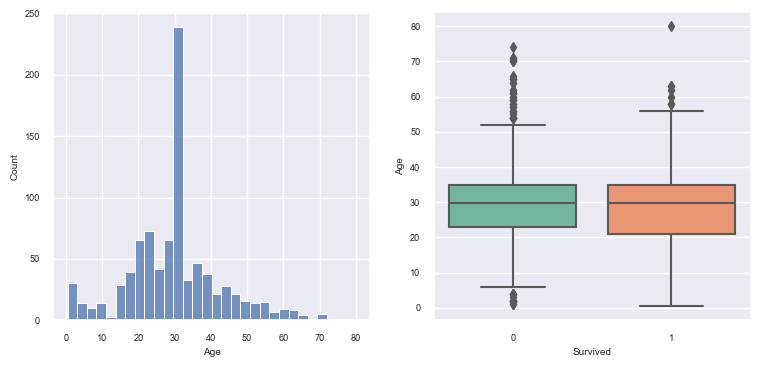

In [26]:
sns.set(font_scale=0.6) # disminuir la letra
fig, ax = plt.subplots(ncols=2, figsize=(9, 4)) # subtrama para agrupar graficos
plt.subplots_adjust(hspace=0.3)# ajustar espacio

sns.histplot(df_train['Age'], kde=False, ax=ax[0])
sns.boxplot(x=df_train['Survived'], y=df_train['Age'],ax=ax[1],palette='Set2')

In [27]:
df_train["Age_group"] = pd.cut(df_train["Age"],bins=range(0,81,5))

In [28]:
media_survived_age = df_train.pivot_table(index="Age_group", columns="Survived",aggfunc="count",values="Age",margins=True)
media_survived_age = media_survived_age.reset_index()
total = media_survived_age.iloc[-1]["All"]
media_survived_age = media_survived_age.iloc[:-1]

In [29]:
media_survived_age["part"] = media_survived_age["All"]/total
media_survived_age["porc_0"] = media_survived_age[0]/ media_survived_age["All"]
media_survived_age["porc_1"] = media_survived_age[1]/ media_survived_age["All"]

In [30]:
media_survived_age

Survived,Age_group,0,1,All,part,porc_0,porc_1
0,"(0, 5]",13,31,44,0.05,0.30,0.70
1,"(5, 10]",13,7,20,0.02,0.65,0.35
2,"(10, 15]",8,11,19,0.02,0.42,0.58
3,"(15, 20]",63,33,96,0.11,0.66,0.34
4,"(20, 25]",80,42,122,0.14,0.66,0.34
5,"(25, 30]",191,94,285,0.32,0.67,0.33
6,"(30, 35]",47,41,88,0.10,0.53,0.47
7,"(35, 40]",39,28,67,0.08,0.58,0.42
8,"(40, 45]",30,17,47,0.05,0.64,0.36
9,"(45, 50]",23,16,39,0.04,0.59,0.41


De acuerdo con la información obtenida se clasifica la edad en base a la proporcion de los superviviente y no supervivientes y al peso de cada grupo como se muestra acontinuación:

In [31]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = [1, 5, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 1, 6, 6, 7]    
df_train["edad_categ"] = pd.cut(df_train["Age"], bins=bins, labels=labels, ordered=False)
df_train["edad_categ"] = df_train["edad_categ"].astype(int)

In [32]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = [1, 5, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 1, 6, 6, 7]    
df_test["edad_categ"] = pd.cut(df_test["Age"], bins=bins, labels=labels, ordered=False)
df_test["edad_categ"] = df_test["edad_categ"].astype(int)

Eliminamos la variable Edad para quedarnos con grupo edad

In [33]:
df_train = df_train.drop(columns="Age")
df_test = df_test.drop(columns="Age")

### Graficamos para ver la correlacion de las variables

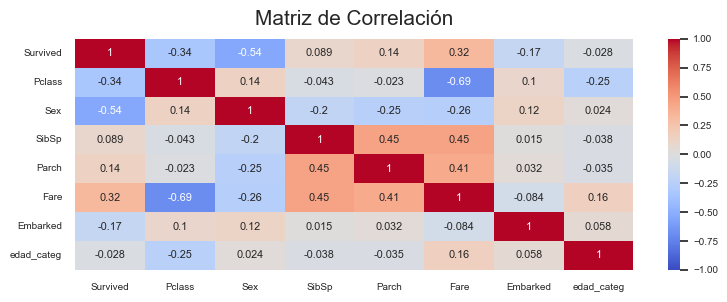

In [34]:
plt.figure(figsize=(9,3))
sns.set(font_scale=0.65) # disminuir la letra
heatmap= sns.heatmap(df_train.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':15}, pad=10);

## Modelo predictivo

Obtener un modelo predictivo para saber si una persona a sobrevivido o no en el naufragio de la embarcación Titanic de 1912

In [35]:
x = df_train[['Pclass','Sex','SibSp','Parch','Fare','Embarked','edad_categ']]
y = df_train['Survived']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [37]:
ids = df_test["PassengerId"]

### Modelo de arbol de decisión

In [57]:
arbol_decision = DecisionTreeClassifier(max_depth=3)#Crear el modelo
arbol_decision.fit(x_train,y_train)# entrenar el modelo
y_pred = arbol_decision.predict(x_test)# predecir la supervivencia en el conjunto de prueba
print(f'validacion Arbol decision: {arbol_decision.score(x_train,y_train)}')
print(f'test Arbol decision: {metrics.accuracy_score(y_test, y_pred)}')

validacion Arbol decision: 0.824438202247191
test Arbol decision: 0.7821229050279329


In [47]:
# Crear tabla de contingencia
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, columns=['No sobrevivientes', 'Sobrevivientes'], index=['No pred', 'Pred'])
df_conf_matrix

,No sobrevivientes,Sobrevivientes
No pred,88,17
Pred,22,52


### Modelo regresión Logistica

In [58]:
regresionLogistica = LogisticRegression(random_state=42)#Crear el modelo
regresionLogistica.fit(x_train, y_train)# entrenar el modelo
y_pred = regresionLogistica.predict(x_test)# Realizar predicciones en los datos de prueba
print(f'validacion Regresión logistica: {arbol_decision.score(x_train,y_train)}')
print(f'test regresion Logistica: {metrics.accuracy_score(y_test, y_pred)}')

validacion Regresión logistica: 0.824438202247191
test regresion Logistica: 0.7821229050279329


In [42]:
# Crear tabla de contingencia
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, columns=['No sobrevivientes', 'Sobrevivientes'], index=['No pred', 'Pred'])
df_conf_matrix

,No sobrevivientes,Sobrevivientes
No pred,87,18
Pred,21,53


### Modelo Support Vector Machine

In [56]:
vectorMachie = svm.SVC(kernel='linear', random_state=42)#Crear el modelo SVM
vectorMachie.fit(x_train, y_train)# entrenar el modelo
y_pred = vectorMachie.predict(x_test)# Realizar predicciones en los datos de prueba
print(f'validacion Suppor Vector Machine: {arbol_decision.score(x_train,y_train)}')
print(f'test Support Vector Machine: {metrics.accuracy_score(y_test, y_pred)}')

test Support Vector Machine: 0.7821229050279329


In [45]:
# Crear tabla de contingencia
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, columns=['No sobrevivientes', 'Sobrevivientes'], index=['No pred', 'Pred'])
df_conf_matrix

,No sobrevivientes,Sobrevivientes
No pred,88,17
Pred,22,52


### Modelo KNeighbors

In [59]:
KNeighbors = KNeighborsClassifier(n_neighbors=5)#Crear el modelo SVM
KNeighbors.fit(x_train, y_train)# entrenar el modelo
y_pred = KNeighbors.predict(x_test)# Realizar predicciones en los datos de prueba
print(f'validacion Kneighbors: {arbol_decision.score(x_train,y_train)}')
print(f'test Kneighbors:{metrics.accuracy_score(y_test, y_pred)}')

validacion Kneighbors: 0.824438202247191
test Kneighbors:0.7877094972067039


In [50]:
# Crear tabla de contingencia
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, columns=['No sobrevivientes', 'Sobrevivientes'], index=['No pred', 'Pred'])
df_conf_matrix

,No sobrevivientes,Sobrevivientes
No pred,91,14
Pred,24,50


### GIT
https://github.com/jancelperez/ciencia_datos_UNAD.git

## Bibliografia

References
Descenso de gradiente. (n.d.). Khan Academy. Retrieved April 2, 2023, from https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent

Rodríguez, D. (2020, April 20). Entrenamiento, validación y test con Scikit-learn. Analytics Lane. https://www.analyticslane.com/2020/04/20/entrenamiento-validacion-y-test-con-scikit-learn/

Roy, B. (2020, July 10). Todo Sobre El manejo De Datos Faltantes. DataSource.Ai. https://www.datasource.ai/es/data-science-articles/todo-sobre-el-manejo-de-datos-faltantes

Selección de características en el proceso de ciencia de datos en equipos - Azure Architecture Center. (n.d.). Microsoft.com. Retrieved April 2, 2023, from https://learn.microsoft.com/es-es/azure/architecture/data-science-process/select-features

Wikipedia contributors. (n.d.). Validación cruzada. Wikipedia, The Free Encyclopedia. https://es.wikipedia.org/w/index.php?title=Validaci%C3%B3n_cruzada&oldid=124047241

(N.d.). Amazon.com. Retrieved April 2, 2023, from https://aws.amazon.com/es/what-is/feature-engineering/